## imports

In [ ]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pathlib
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow import keras
from tensorflow.keras import layers
import PIL
import matplotlib.pyplot as plt

## image preprocessing

In [ ]:

training_dir = pathlib.Path('./../dataset/training')
validation_dir = pathlib.Path('./../dataset/validation/gallery')

image_count = len(list(training_dir.glob('*/*.JPEG')))
print(image_count)

image_count = len(list(validation_dir.glob('*/*.JPEG')))
print(image_count)


2174
463


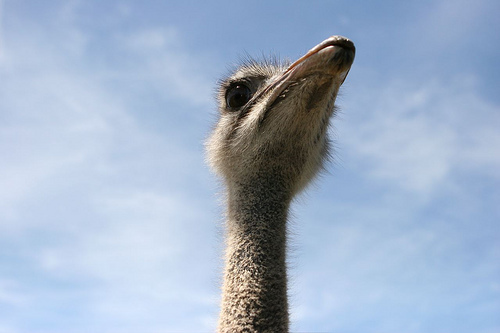

In [ ]:
ostrichs = list(training_dir.glob('n01518878(ostrich)/*'))

PIL.Image.open(str(ostrichs[0]))# bello questo struzzo 



## train and validation set 

In [ ]:
img_height = 128
img_width = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    #validation_split=0.2,
   # subset="training",
    seed=420,
    image_size=(img_height, img_width)

)

val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
   # validation_split=0.2,
   # subset="validation",
    seed=420,
    image_size=(img_height, img_width)

)



NameError: name 'tf' is not defined

In [ ]:
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label


AUTOTUNE = tf.data.experimental.AUTOTUNE

ds_train = (
    train_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

ds_valid = (
    val_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

## define model

In [ ]:
IMG_SHAPE = (img_height, img_width, 3 )
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')


# questp è la rete neurale con i vari livelli
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(filters=16, kernel_size = 3, padding='same', activation='relu'),
    layers.MaxPooling2D(strides=(2, 2)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(strides=(2, 2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
    

])

model.summary()




NameError: name 'img_height' is not defined

## train

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=10,
)

Epoch 1/10
/shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
68/68 [==============================] - 46s 666ms/step - loss: 2.1523 - accuracy: 0.2029 - val_loss: 3.2561 - val_accuracy: 0.0605
Epoch 2/10
68/68 [==============================] - 38s 562ms/step - loss: 1.6324 - accuracy: 0.4296 - val_loss: 4.2235 - val_accuracy: 0.0518
Epoch 3/10
68/68 [==============================] - 39s 568ms/step - loss: 1.1609 - accuracy: 0.6003 - val_loss: 4.7580 - val_accuracy: 0.0518
Epoch 4/10
68/68 [==============================] - 39s 573ms/step - loss: 0.6825 - accuracy: 0.7893 - val_loss: 5.8605 - val_accuracy: 0.0778
Epoch 5/10
68/68 [==============================] - 39s 575ms/step - loss: 0.3999 - 

NameError: name 'test_images' is not defined

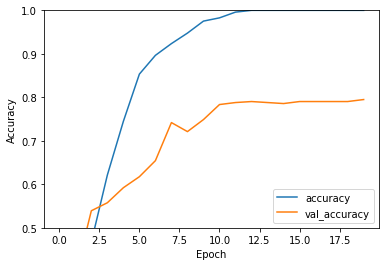

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=93aceac2-8452-469e-8b02-c16d0438aa9c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>